In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qcd_likelihood import pQCD

In [2]:
mu = 2.6

for X in [1, 2, 4]:
    # I have to divide X by 2 to get numbers that agree with Table. 1 in 
    # http://arxiv.org/abs/2111.05350, because the pQCD class multiplies X by 2
    # upon initialization.
    pQCDX = pQCD(X/2)
    print(f'X = {X}:')
    print(f'n = {pQCDX.number_density(mu)} fm^-3')
    print(f'p = {pQCDX.pressure(mu)} GeV/fm^3')
    print('')

X = 1:
n = 6.1463327464130355 fm^-3
p = 2.3345795415596515 GeV/fm^3

X = 2:
n = 6.472805018284799 fm^-3
p = 3.8232745461649347 GeV/fm^3

X = 4:
n = 6.870611956625028 fm^-3
p = 4.284403308818806 GeV/fm^3



In [3]:
X_array = np.linspace(0.5, 2, 100)
mu_grid = [2.4, 2.5, 2.6]

n_arrays = [np.zeros_like(X_array) for _ in mu_grid]
p_arrays = [np.zeros_like(X_array) for _ in mu_grid]
epsilon_arrays = [np.zeros_like(X_array) for _ in mu_grid]

for i, mu in enumerate(mu_grid):
    for j, X in enumerate(X_array):
        pQCDX = pQCD(X)
        n_arrays[i][j] = pQCDX.number_density(mu)
        p_arrays[i][j] = pQCDX.pressure(mu)
        epsilon_arrays[i][j] = pQCDX.edens(mu)

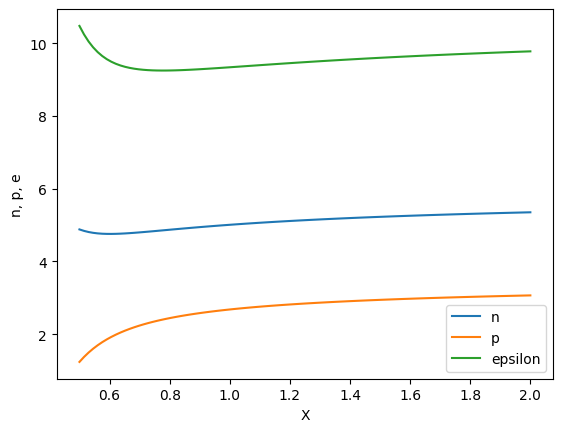

In [4]:
fig, ax = plt.subplots()

ax.plot(X_array, n_arrays[0], label='n')
ax.plot(X_array, p_arrays[0], label='p')
ax.plot(X_array, epsilon_arrays[0], label='epsilon')

ax.set_xlabel('X')
ax.set_ylabel('n, p, e')
ax.legend()

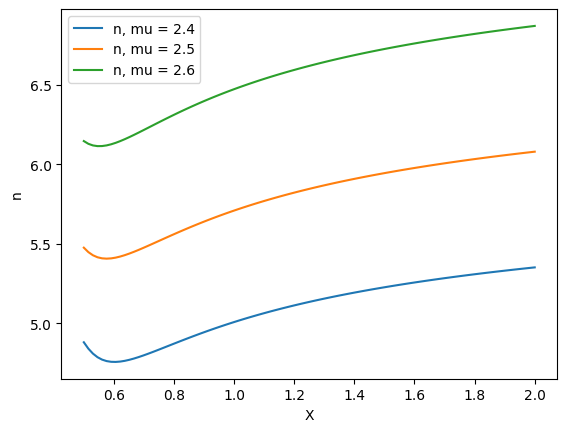

In [5]:
fig, ax = plt.subplots()

for i, mu in enumerate(mu_grid):
    ax.plot(X_array, n_arrays[i], label=f'n, mu = {mu}')

ax.set_xlabel('X')
ax.set_ylabel('n')
ax.legend()